In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the datasets below

In [2]:
df_train = pd.read_excel("train.xlsx")
df_test = pd.read_excel("test.xlsx")
df_val=pd.read_excel('validate.xlsx')

In [3]:
#Reading locations.txt

f = open('locations.txt','r')
loc = f.read()
loc = loc.replace('"','')
loc = loc.strip('][\n').split(",")

In [4]:
#Reading pincodes.txt

f = open('pincodes.txt','r')
pin= f.read()
pin = pin.replace('"','')
pin = pin.strip('][').split(",")
pin = list(map(int,pin))

In [5]:
#Mapping location to pincode and adding pincode column to dataset

l_p=dict(zip(loc,pin))
df_train['Pincode']=df_train['Location'].map(l_p)
df_test['Pincode']=df_test['Location'].map(l_p)
df_val['Pincode']=df_val['Location'].map(l_p)

EDA, Data Cleaning, Data processing (Imputation, categorical variables, variable encoding, feature engineering etc)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    810 non-null    object 
 1   Bathrooms   810 non-null    object 
 2   Facing      810 non-null    object 
 3   Furnishing  810 non-null    object 
 4   Tennants    810 non-null    object 
 5   Area        770 non-null    object 
 6   Price       810 non-null    object 
 7   Locality    810 non-null    object 
 8   Location    807 non-null    object 
 9   Pincode     799 non-null    float64
dtypes: float64(1), object(9)
memory usage: 63.4+ KB


In [7]:
df_train.isnull().sum()

Bedrooms       0
Bathrooms      0
Facing         0
Furnishing     0
Tennants       0
Area          40
Price          0
Locality       0
Location       3
Pincode       11
dtype: int64

In [8]:
df_test.isnull().sum()

Bedrooms      0
Bathrooms     5
Facing        5
Furnishing    0
Tennants      1
Area          6
Price         0
Locality      0
Location      0
Pincode       2
dtype: int64

In [9]:
#Cleaning Bathrooms column

def clean_bath(val):
  if type(val) is int:
    return val
  return None
df_train['Bathrooms'] = df_train['Bathrooms'].apply(clean_bath)
df_test['Bathrooms'] = df_test['Bathrooms'].apply(clean_bath)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bathrooms', ylabel='Density'>

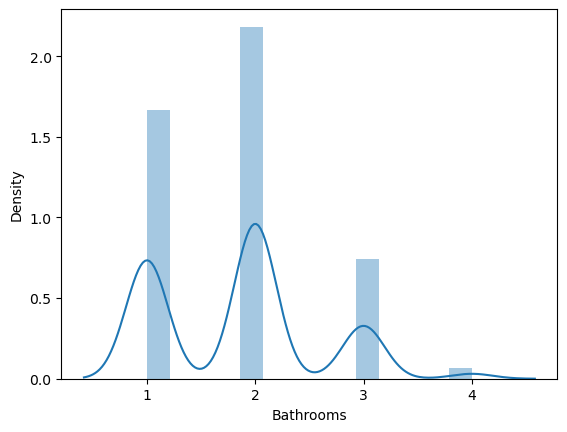

In [10]:
sns.distplot(df_train['Bathrooms'])
     

In [11]:
df_train['Bathrooms'].fillna(df_train['Bathrooms'].mean(),inplace=True)
df_test['Bathrooms'].fillna(df_test['Bathrooms'].mean(),inplace=True)
df_train['Bathrooms'] = df_train['Bathrooms'].astype(int)
df_test['Bathrooms'] = df_test['Bathrooms'].astype(int)
df_val['Bathrooms'].fillna(df_val['Bathrooms'].mean(),inplace=True)
df_val['Bathrooms'] = df_val['Bathrooms'].astype(int)

In [12]:
#Cleaning Facing column

def clean_facing(val):
  if val in ['North','East','West','South','Main Road','North - East','North - West','South - West','South - East']:
    return val
  return None
df_train['Facing']=df_train['Facing'].apply(clean_facing)
df_test['Facing']=df_test['Facing'].apply(clean_facing)
df_val['Facing']=df_val['Facing'].apply(lambda x:x.capitalize())
df_val['Facing']=df_val['Facing'].apply(clean_facing)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Facing', ylabel='count'>

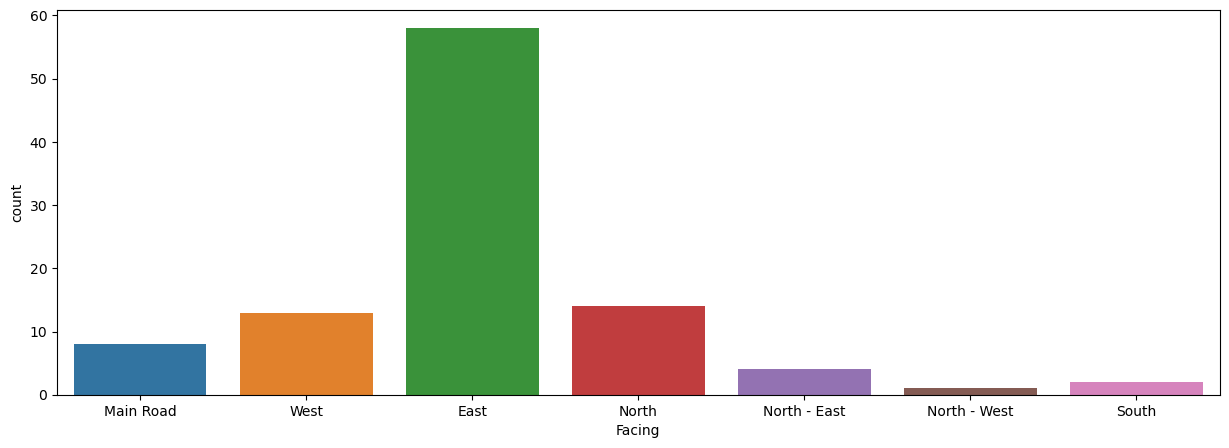

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(df_train['Facing'])

In [14]:
df_train['Facing'].fillna(df_train['Facing'].mode()[0],inplace=True)
df_test['Facing'].fillna(df_test['Facing'].mode()[0],inplace=True)
df_val['Facing'].fillna(df_val['Facing'].mode()[0],inplace=True)

In [15]:
#Cleaning Furnishing column

def clean_furnish(val):
  if val in ['Unfurnished','Furnished','Semi-Furnished']:
    return val
  return None
df_train['Furnishing']=df_train['Furnishing'].apply(clean_furnish)
df_test['Furnishing']=df_test['Furnishing'].apply(clean_furnish)
df_val['Furnishing']=df_val['Furnishing'].apply(clean_furnish)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Furnishing', ylabel='count'>

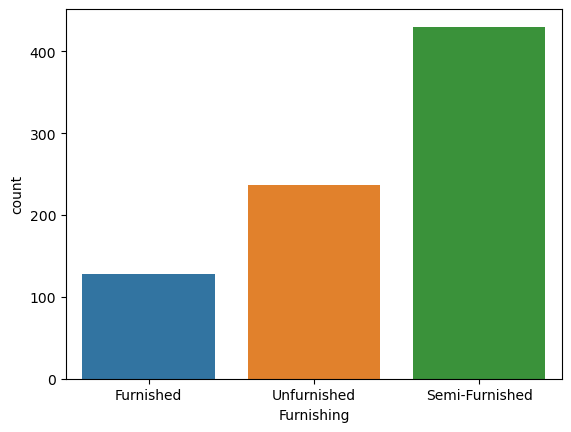

In [16]:
sns.countplot(df_train['Furnishing'])

In [17]:
df_train['Furnishing'].fillna(df_train['Furnishing'].mode()[0],inplace=True)
df_test['Furnishing'].fillna(df_test['Furnishing'].mode()[0],inplace=True)
df_val['Furnishing'].fillna(df_val['Furnishing'].mode()[0],inplace=True)

In [18]:
#Convert the Multi-Value Column ('Tennants') to Multiple Rows

# df_train['Tennants']=df_train['Tennants'].str.split("/")
# df_train=df_train.explode('Tennants')
# df_test['Tennants']=df_test['Tennants'].str.split("/")
# df_test=df_test.explode('Tennants')

In [19]:
#Cleaning Tennants column

def clean_ten(val):
  if val in ['Family','Bachelors','Bachelors/Family']:
    return val
  return None
df_train['Tennants']=df_train['Tennants'].apply(clean_ten)
df_test['Tennants']=df_test['Tennants'].apply(clean_ten)
df_val['Tennants']=df_val['Tennants'].apply(clean_ten)

/Users/agnik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tennants', ylabel='count'>

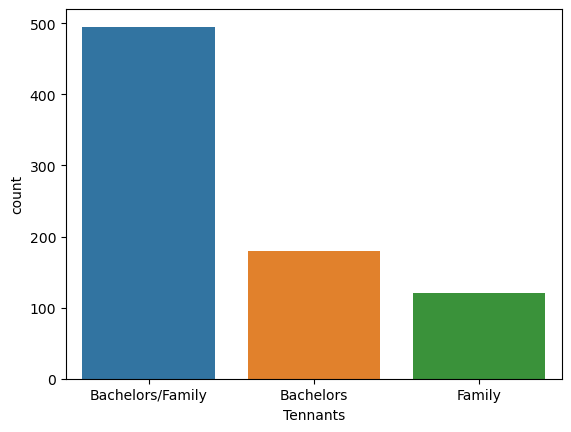

In [20]:
sns.countplot(df_train['Tennants'])

In [21]:
df_train['Tennants'].fillna(df_train['Tennants'].mode()[0],inplace=True)
df_test['Tennants'].fillna(df_test['Tennants'].mode()[0],inplace=True)
df_val['Tennants'].fillna(df_val['Tennants'].mode()[0],inplace=True)

In [22]:
df_train['Area'].fillna('k',inplace=True)
df_test['Area'].fillna('k',inplace=True)
df_val['Area'].fillna('k',inplace=True)

In [23]:
#Cleaning Area Column

def clean_area(val):
  val=str(val)
  if val=='k' or val=='read more':
    return 0  
  if ',' in val:
    val=val.replace(",","")
  if val.endswith('sqyrd'):
    return int(val.strip('sqyrd'))*9
  elif val.endswith('ground'):
    return int(val.strip('ground'))*2400
  return int(val.strip('sqft'))
df_train['Area']=df_train['Area'].apply(clean_area)
df_test['Area']=df_test['Area'].apply(clean_area)
df_val['Area']=df_val['Area'].apply(clean_area)

In [24]:
df_train['Area'].replace(0,df_train['Area'].mean(),inplace=True)
df_train['Area']=df_train['Area'].astype(int)
df_test['Area'].replace(0,df_test['Area'].mean(),inplace=True)
df_test['Area']=df_test['Area'].astype(int)
df_val['Area'].replace(0,df_val['Area'].mean(),inplace=True)
df_val['Area']=df_val['Area'].astype(int)

In [25]:
#Cleaning Price column
def clean_price(val):
  val=str(val)
  if ',' in val:
    val=val.replace(",","")
  return int(val)
  
df_train['Price']=df_train['Price'].apply(clean_price)
df_test['Price']=df_test['Price'].apply(clean_price)

Cleaning Location and Pincode

In [26]:
df_train['Location'].fillna(df_train['Location'].mode()[0],inplace=True)
df_test['Location'].fillna(df_test['Location'].mode()[0],inplace=True)
df_val['Location'].fillna(df_val['Location'].mode()[0],inplace=True)

In [27]:
df_train['Pincode'].fillna(df_train['Pincode'].mode()[0],inplace=True)
df_test['Pincode'].fillna(df_test['Pincode'].mode()[0],inplace=True)
df_train['Pincode']=df_train['Pincode'].astype(int)
df_test['Pincode']=df_test['Pincode'].astype(int)

In [28]:
df_train.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,3 BHK Apartment,2,East,Furnished,Bachelors/Family,1800,35000,"Khairatabad, NH",Khairatabad,500004
1,3 BHK Apartment,2,East,Unfurnished,Bachelors,1495,23000,"SMR Vinay City, Miyapur, NH",Miyapur,500050
2,3 BHK Builder Floor,2,Main Road,Semi-Furnished,Bachelors/Family,1800,16000,"Old Malakpet, NH",Dilshuknagar,500068
3,3 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1200,20000,Brindavan Colony-Toli Chowki,Mehdipatnam,500028
4,2 BHK Apartment,2,East,Furnished,Bachelors/Family,1050,28000,Police Colony-Kondapur,Kondapur,500032


In [29]:
df_test.head()

,Bedrooms,Bathrooms,Facing,Furnishing,Tennants,Area,Price,Locality,Location,Pincode
0,2 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1200,10000,Uppal Metro,Uppal,500007
1,3 BHK Apartment,3,West,Semi-Furnished,Bachelors/Family,1834,40000,"My Home Avatar, Narsingi, Outer Ring Road",Narsingi,500032
2,2 BHK Apartment,2,East,Unfurnished,Bachelors,1493,9500,"Uppal, NH",Uppal,500007
3,2 BHK Apartment,2,East,Semi-Furnished,Bachelors/Family,1100,13000,"New Bowenpally, NH",Bowenpally,500067
4,2 BHK Apartment,2,East,Semi-Furnished,Family,1200,16000,KPHB,KPHB,500018
